# Exploation_05

## 1. Rock Scissor Paper

### 1.1 모듈 설정

- import할 라이브러리를 보기 편하게 모아놓습니다.

In [163]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras

import PIL
from PIL import Image
import glob

from sklearn import model_selection
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
import os
from os.path import join
from google.colab import drive

- 가장 중요한 핵심입니다.  
- 우리는 Google Colab 환경에서 모델을 돌릴 예정입니다.  
  Colab을 이용하면 편리한 것이 아래 drive.monut() 하나로 쉽게 구글 드라이브를 연동할 수 있습니다. 

In [2]:
drive.mount('/gdrive')

Mounted at /gdrive


### 1.2 함수 정리

#### 1.2.1 resize_images

- 불러오는 이미지를 28 x 28로 맞추기 위해 resize를 사용합니다.

In [164]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")  
    
	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.ANTIALIAS)
		new_img.save(img, "JPEG")
    
	print(len(images), " images resized.")

### 1.2.2 load_data

- 이미지가 있는 폴더를 입력받아서 labeling합니다.
- 참고로 load_data의 number_of_data는 정확한 갯수를 적지 않으면 임의의 빈 데이터가 들어가는 것 같습니다.   
정확하게 기재하고, 필요에 의해 바꾸면서 진행하면 될 것 같습니다.

In [267]:
def load_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=4020
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/train_scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/train_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1  
    
    for file in glob.iglob(img_path+'/train_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

### 1.2.3 load_test_data

- 위와 동일합니다.

In [184]:
def load_test_data(img_path):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=390
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/test_scissors/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/test_rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/test_paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    return imgs, labels

### 1.3 데이터

#### 1.3.1 데이터 생성

- Rock, Scissor, Paper를 분류하는 모델을 만들 예정입니다. 우선 webcam을 이용해서 한 땀 한 땀 데이터를 만들어줍니다.
- 아래의 사이트에서 class를 나눠가며 이미지 데이터를 생성할 수 있습니다.  
- 구글 드라이브와 연동하여 생성된 이미지도 바로 구글 드라이브로 보낼 수도 있습니다.
- 처음 244 x 244로 만든 후 resize를 진행하겠습니다.

- https://teachablemachine.withgoogle.com/train

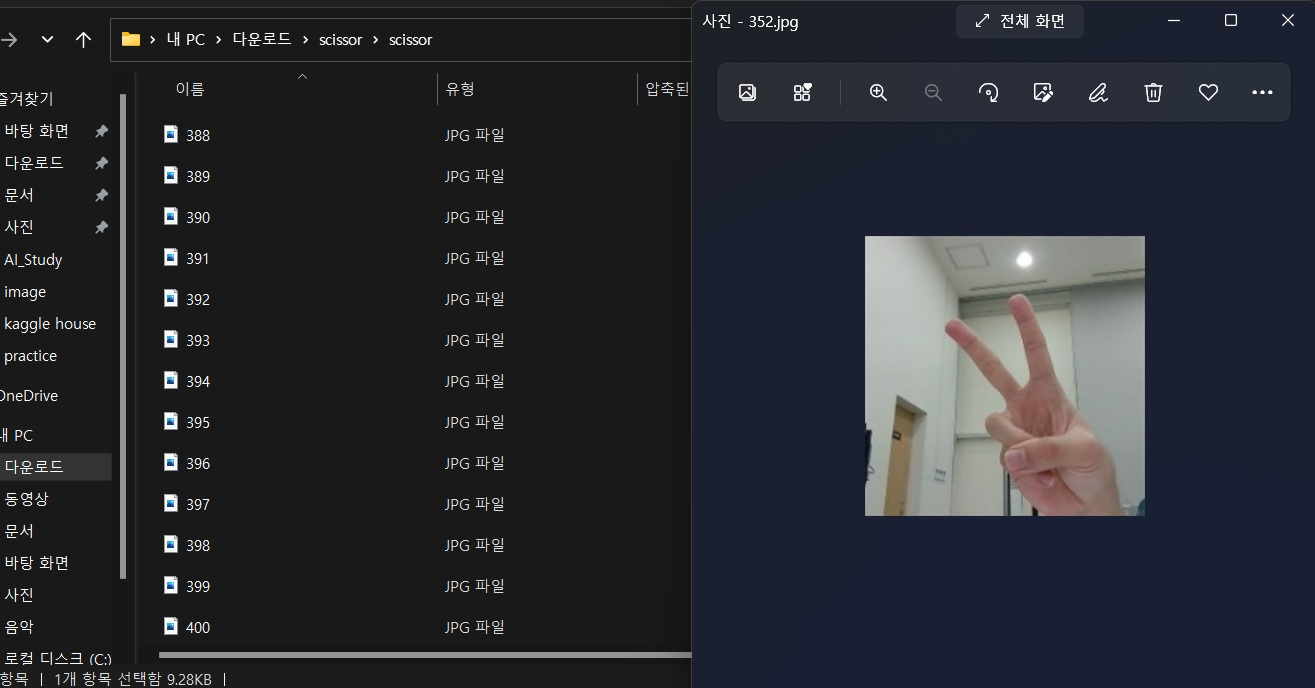

In [8]:
Image('/gdrive/My Drive/Colab Notebooks/image/rsp00.jpg')

- Rock, Scissor, Paper 각각 400장 촬영하였습니다.

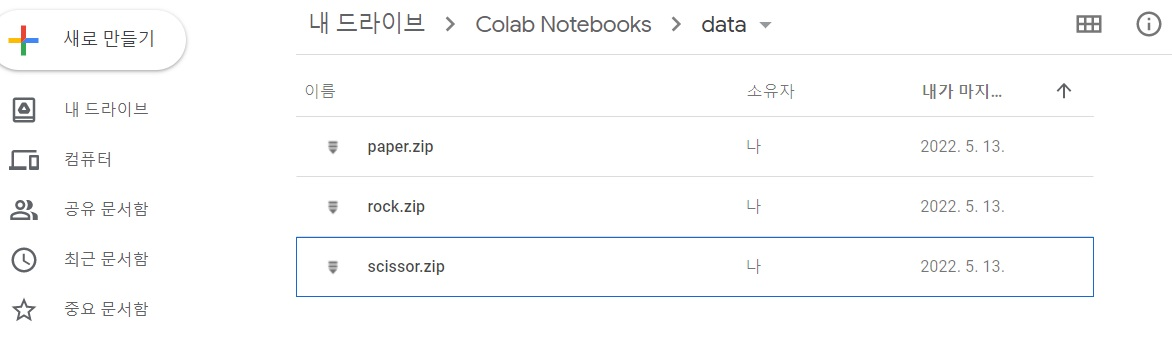

In [10]:
Image('/gdrive/My Drive/Colab Notebooks/image/rsp01.jpg')

- 파일은 압축된 상태로 "gdrive/My Drive/Colab Notebooks/data/" 경로에 잘 모셔둡니다.

#### 1.3.2 데이터 처리

1) 압축 해제

- 생각해보니 드라이브에는 zip파일이 올라가 있습니다.  
- 처음부터 압축을 푼 상태로 올리면 편하겠지만, 이미지 갯수가 많아지고 용량이 커지면 압축 상태로 올리는 게 더 효율적일 것으로 생각됩니다.  
- 이번에 드라이브 안에서 압축을 풀고 확인하는 과정을 확실히 알아둡니다.

In [171]:
%cd /gdrive/MyDrive/Colab Notebooks/data/original
!unzip -qq "/gdrive/MyDrive/Colab Notebooks/data/original/train_scissors.zip"

/gdrive/MyDrive/Colab Notebooks/data/original


- %cd를 이용해 압축 해제할 경로를 지정합니다.
- !unzip -qq "zip path"까지 하면 압축이 잘 풀립니다.

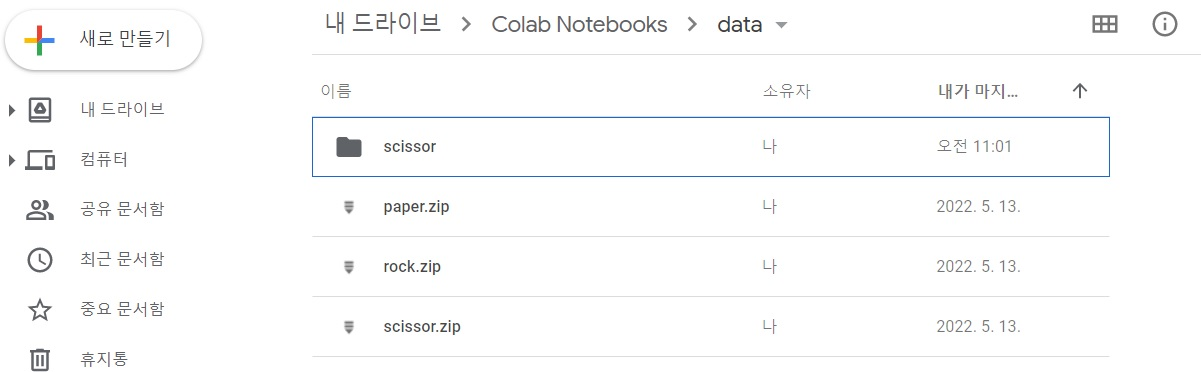

In [24]:
Image('/gdrive/My Drive/Colab Notebooks/image/rsp02.jpg')

- 압축이 잘 풀린 것을 확인할 수 있습니다. 나머지 Rock과 Paper도 같은 작업을 반복해줍니다.

In [172]:
%cd /gdrive/MyDrive/Colab Notebooks/data/original
!unzip -qq "/gdrive/MyDrive/Colab Notebooks/data/original/train_rock.zip"

/gdrive/MyDrive/Colab Notebooks/data/original
replace train_rock/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


- 압축 해제 시간이 생각보다 걸립니다. 드라이브에서 폴더 생성이 안되었다고 반복하면 위처럼 replace 할껀지 물어봅니다.

In [173]:
%cd /gdrive/MyDrive/Colab Notebooks/data/original
!unzip -qq "/gdrive/MyDrive/Colab Notebooks/data/original/train_paper.zip"

/gdrive/MyDrive/Colab Notebooks/data/original


2) resize

- 위에서 작성한 resize_images를 이용하여 각 폴더의 파일 이미지 사이즈를 224 x 224에서 28 x 28로 변경합니다.

In [174]:
image_train_rock = "/gdrive/My Drive/Colab Notebooks/data/original/train_rock"
resize_images(image_train_rock)

400  images to be resized.
400  images resized.


In [175]:
image_train_paper = "/gdrive/My Drive/Colab Notebooks/data/original/train_paper"
resize_images(image_train_paper)

400  images to be resized.
400  images resized.


In [176]:
image_train_scissor = "/gdrive/My Drive/Colab Notebooks/data/original/train_scissor"
resize_images(image_train_scissor)

400  images to be resized.
400  images resized.


- Rock, Scissor, Paper 각 400장씩 resize 작업을 마쳤습니다.

#### 1.3.3 데이터 로드

- 위에서 작성한 load_data를 활용합니다.
- 교차검증을 위해 validation set도 랜덤으로 나눠줍니다.

In [179]:
image_folder_path = "/gdrive/My Drive/Colab Notebooks/data/original"
(X_train, y_train)=load_data(image_folder_path)
X_train_norm = X_train/255.0   # 입력은 0~1 사이의 값으로 정규화
X_train, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=22)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))

학습데이터(x_train)의 이미지 개수는 1200 입니다.
X_train shape: (960, 28, 28, 3)
y_train shape: (960,)
X_val shape: (240, 28, 28, 3)
y_val shape: (240,)


- 가위, 바위, 보 총 1,200개의 데이터가 train 960개, val 240개로 잘 나뉘였습니다.

레이블:  1


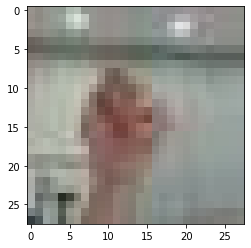

In [180]:
plt.imshow(X_train[0])
print('레이블: ', y_train[0])

- 바위입니다. 레이블도 잘 나옵니다   
 다음으로 넘어갑니다.  
  (Scissor : 0 / Rock : 1 / Paper : 2) 

### 1.4 모델

#### 1.4.1 모델 생성

- TensorFlow의 Sequential 모델을 이용합니다.
- 자세한 내용을 아래를 참고하여 만들 수 있습니다.
- https://www.tensorflow.org/guide/keras/sequential_model?hl=ko

In [181]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  8


- 코드를 이해하고 사용하는 것이 중요하다고 생각합니다. 하나 하나 살펴봅니다.

1) model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,3)))
- 영상처리에 주로 사용되는 Conv2D layer를 살펴봅니다.
- keras.layers.Conv2D(16, (3,3))  
  (16, (3,3))에서 16이 의미하는 것은 필터의 개수입니다. (3,3)은 커널의 (행,열)입니다. 
- activation='relu'  
  활성화 함수를 설정합니다. relu를 사용하며 때에 따라 sigmoid, softmax 등을 적절하게 바꿔서 사용할 수 있습니다.
- input_shape=(28, 28, 3)  
  우리는 resize를 통해 28 x 28 이미지를 만들었습니다. 이를 Convolution layer에 넣어주는 것이므로(행x열x채널)로 입력사이즈를 지정합니다.

- 정리하자면 3개의 채널(컬러) 28x28의 이미지를 3x3의 사이즈 필터 16개를 거쳐 relu 활성화함수를 이용하고 출력한다는 의미로 이해했습니다.

2) model.add(keras.layers.MaxPool2D(2,2))

- 앞서 만들어진 출력 값에서 주요 값만 뽑아 크기가 작은 영상을 만들어주는 것을 pooling이라고 합니다.
- 아래 summary 2개를 비교하며 보겠습니다.

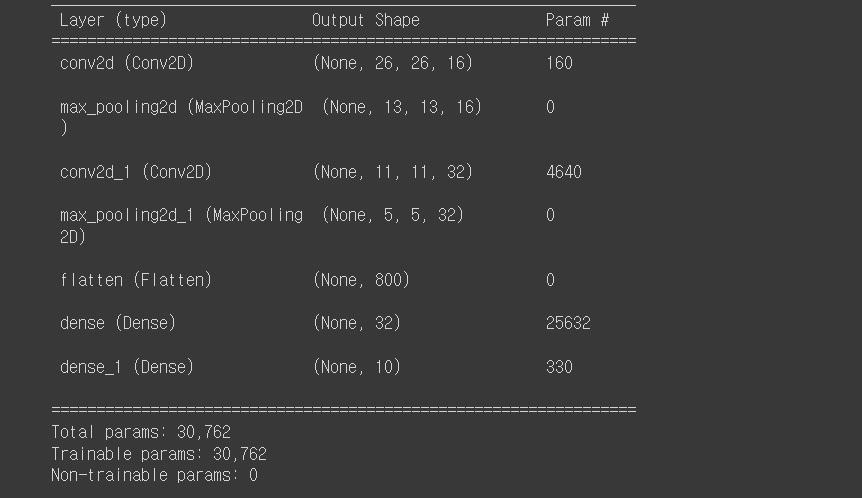

In [21]:
Image('/gdrive/My Drive/Colab Notebooks/image/rsp04.jpg')

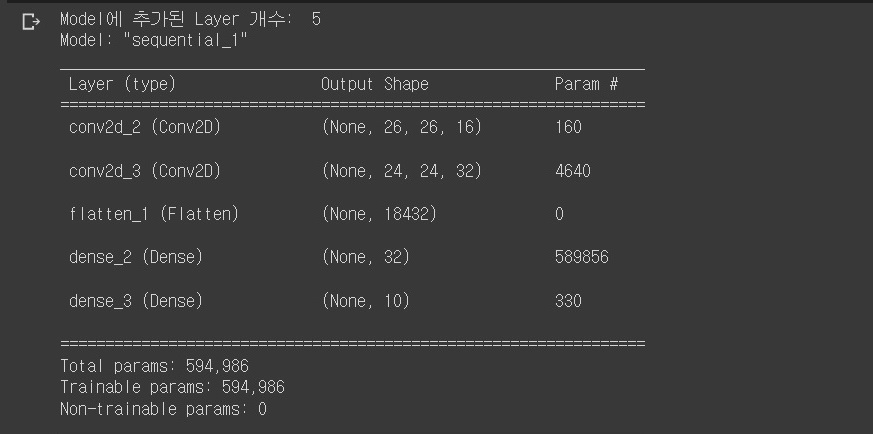

In [22]:
Image('/gdrive/My Drive/Colab Notebooks/image/rsp03.jpg')

- 차이는 pooling layer의 유무입니다.
- pooling을 통해 일종의 요약을 해주지 않으면 flatten layer에서 18432개의 변수를 가진 데이터를 출력하는 결과를 가져오고 dense_2에서 32 * (18432 + 1(bias)) 갯수의 가중치(589,856개)가 필요하게 됩니다. 너무 많습니다.
- 결론은 keras.layers.MaxPool2D(2,2)에서 2x2사이즈로 축소 비율을 맞춰주면 2x2 안에서 max값을 따로 유지하며 줄여갑니다.
- 특징 맵에서 값이 크다는 것은 필터로 찾으려는 특징이 많다고 이해했습니다.

4) model.add(keras.layers.Flatten())

- Flatten layer는 위에서 추출한 특징을 전결합층(이전 층의 모든 유닛과 서로 연결되어 있는 은닉층 또는 출력층)에 전달하는 역할을 합니다.
- conv2D와 maxpool layer를 거친 결과값을 1차원 벡터로 쫙 펼쳐준다고 이해했습니다.

5) model.add(keras.layers.Dense(128, activation='relu'))

- Dence layer는 입력층과 출력층을 연결해주는 layer입니다.
- keras.layers.Dense(128, activation='relu') 앞에 32는 뉴런의 수이고 뒤의 activation은 활성화 함수를 의미합니다.

- layer add에 들어가는 코드를 살펴보고 넣었으니 model.summary()를 통해 모델이 잘 만들어졌는지 확인합니다.

In [182]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 128)       3584      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 1600)              0         
                                                                 
 dense_35 (Dense)            (None, 128)             

- 잘 만들어진 것을 확인할 수 있습니다.

#### 1.4.2 모델 학습

- 사전에 train과 val로 나누었으니 모델에 학습시켜 보겠습니다.

In [183]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
30/30 [==============================] - 1s 11ms/step - loss: 1.0852 - accuracy: 0.4031 - val_loss: 1.0141 - val_accuracy: 0.7208
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 0.7787 - accuracy: 0.6906 - val_loss: 0.4806 - val_accuracy: 0.8667
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 0.2811 - accuracy: 0.9344 - val_loss: 0.0948 - val_accuracy: 0.9792
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9750 - val_loss: 0.0372 - val_accuracy: 0.9958
Epoch 5/10
30/30 [==============================] - 0s 6ms/step - loss: 0.0613 - accuracy: 0.9844 - val_loss: 0.0307 - val_accuracy: 0.9958
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9896 - val_loss: 0.0206 - val_accuracy: 0.9958
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 0.0400 - accuracy: 0.9896 - val_loss: 0.0186 - val_accuracy: 1.0000
Epoch 8/10
30/30 [=

- 학습 모델의 loss값도 잘 떨어지고 accuracy와 교차검증을 위한 데이터 val_accuracy가 모두 잘 나오고 있습니다.

- 일단 test 데이터를 준비하여 학습된 모델에 넣어보겠습니다.

#### 1.4.3 모델 테스트

- test data를 준비합니다(각각 130개씩 총 390개입니다)
- 위와 동일하게 resized, labeling합니다.

In [100]:
%cd /gdrive/MyDrive/Colab Notebooks/data/test
!unzip -qq "/gdrive/MyDrive/Colab Notebooks/data/test/rock_scissor_paper.zip"

/gdrive/MyDrive/Colab Notebooks/data/test


In [143]:
image_test_scissors = "/gdrive/My Drive/Colab Notebooks/data/test_scissors"
resize_images(image_test_scissors)

130  images to be resized.
130  images resized.


In [139]:
image_test_rock = "/gdrive/My Drive/Colab Notebooks/data/test_rock"
resize_images(image_test_rock)

130  images to be resized.
130  images resized.


In [138]:
image_test_paper = "/gdrive/My Drive/Colab Notebooks/data/test_paper"
resize_images(image_test_paper)

130  images to be resized.
130  images resized.


In [185]:
image_test_path = "/gdrive/My Drive/Colab Notebooks/data"
(X_test, y_test)=load_test_data(image_test_path)
X_test_norm = X_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (390, 28, 28, 3)
y_test shape: (390,)


In [186]:
test_loss, test_accuracy = model.evaluate(X_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

13/13 - 0s - loss: 3.3087 - accuracy: 0.3769 - 51ms/epoch - 4ms/step
test_loss: 3.3087174892425537 
test_accuracy: 0.3769230842590332


- accuracy를 보자마자 overfitting이라고 확신합니다.  
분명 학습에서는 accuracy가 0.99를 기록했는데 전혀 본적 없는 test data를 보니 형편없이 떨어집니다.

In [187]:
predicted_result = model.predict(X_test)  # model이 추론한 확률값. 
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 1. 0.]
model이 추론한 가장 가능성이 높은 결과 :  1
실제 데이터의 라벨 :  0


- 예측해봤는데요 파국입니다.

- overfitting이라고 생각하니 overfitting을 방지할 방법을 찾아봅니다.

### 1.5 overfitting

- 제가 찾아본 overfitting을 방지하기 위한 수단은 3가지입니다.
- 학습 데이터의 양을 늘린다.
- 모델의 복잡도를 줄인다.
- keras의 dropout을 사용한다.
- 우선 데이터의 양을 늘려보고, model layer의 복잡도를 줄이면서 dropout도 같이 적용해보겠습니다.

1) 데이터의 양을 늘린다

- 구글에 더 많은 데이터가 있겠지만, 일단 https://laurencemoroney.com/ 이라는 곳에서 제공하는 rock, scissor, paper 데이터를 추가합니다.  
(이 데이터는 rock, scissor, paper가 각각 1,340개씩 총 4,020개가 존재합니다.)

- 4,020개도 만족스럽지는 않습니다만, 일단 돌려봅니다.

- 위 과정과 동일하게 데이터를 처리합니다.

In [268]:
image_new_train_scissors = "/gdrive/My Drive/Colab Notebooks/data/new/train_scissors"
resize_images(image_new_train_scissors)

1340  images to be resized.
1340  images resized.


In [269]:
image_new_train_rock = "/gdrive/My Drive/Colab Notebooks/data/new/train_rock"
resize_images(image_new_train_rock)

1340  images to be resized.
1340  images resized.


In [270]:
image_new_train_paper = "/gdrive/My Drive/Colab Notebooks/data/new/train_paper"
resize_images(image_new_train_paper)

1340  images to be resized.
1340  images resized.


- 실수로 기존 데이터와 섞여 들어갈까봐 이름도 수정해줍니다.

In [271]:
new_image_folder_path = "/gdrive/My Drive/Colab Notebooks/data/new"
(new_X_train, new_y_train)=load_data(new_image_folder_path)
new_X_train_norm = new_X_train/255.0   # 입력은 0~1 사이의 값으로 정규화
new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(new_X_train_norm, new_y_train, test_size=0.2, random_state=22)

print("new_x_train shape: {}".format(new_X_train.shape))
print("new_y_train shape: {}".format(new_y_train.shape))
print("new_x_val shape: {}".format(new_X_val.shape))
print("new_y_val shape: {}".format(new_y_val.shape))

학습데이터(x_train)의 이미지 개수는 2680 입니다.
new_x_train shape: (3216, 28, 28, 3)
new_y_train shape: (3216,)
new_x_val shape: (804, 28, 28, 3)
new_y_val shape: (804,)


레이블:  2


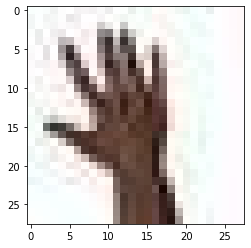

In [272]:
plt.imshow(new_X_train[55])
print('레이블: ', new_y_train[55])

- 보입니다. 레이블도 잘 나옵니다   
 다음으로 넘어갑니다.  
  (Scissor : 0 / Rock : 1 / Paper : 2) 

- 모델은 동일한 모델에 이름만 'new_'를 붙였습니다.

In [328]:
new_model=keras.models.Sequential()
new_model.add(keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(28,28,3)))
new_model.add(keras.layers.MaxPool2D(2,2))
new_model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
new_model.add(keras.layers.MaxPooling2D((2,2)))
new_model.add(keras.layers.Flatten())
new_model.add(keras.layers.Dense(128, activation='relu'))
new_model.add(keras.layers.Dense(64, activation='relu'))
new_model.add(keras.layers.Dense(3, activation='softmax'))

print('new_Model에 추가된 Layer 개수: ', len(new_model.layers))

new_Model에 추가된 Layer 개수:  8


In [329]:
new_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

new_history = new_model.fit(new_X_train, new_y_train, epochs=10, validation_data=(new_X_val, new_y_val))

Epoch 1/10
101/101 [==============================] - 1s 7ms/step - loss: 0.4249 - accuracy: 0.8035 - val_loss: 0.1095 - val_accuracy: 0.9677
Epoch 2/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0803 - accuracy: 0.9698 - val_loss: 0.0380 - val_accuracy: 0.9863
Epoch 3/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0521 - accuracy: 0.9801 - val_loss: 0.0361 - val_accuracy: 0.9838
Epoch 4/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.9935 - val_loss: 0.0151 - val_accuracy: 0.9938
Epoch 5/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0092 - accuracy: 0.9975 - val_loss: 0.0230 - val_accuracy: 0.9863
Epoch 6/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0377 - val_accuracy: 0.9813
Epoch 7/10
101/101 [==============================] - 1s 5ms/step - loss: 0.0053 - accuracy: 0.9984 - val_loss: 0.0056 - val_accuracy: 0.9975
Epoch 

- accuracy를 보니 이번에도 overfitting을 피하지는 못한 것 같습니다...

In [330]:
new_test_loss, new_test_accuracy = new_model.evaluate(X_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(new_test_loss))
print("test_accuracy: {}".format(new_test_accuracy))

13/13 - 0s - loss: 3.3148 - accuracy: 0.6564 - 53ms/epoch - 4ms/step
test_loss: 3.3147592544555664 
test_accuracy: 0.656410276889801


- 우려했는데 그래도 생각보다 accuracy가 높게 나옵니다.  
 데이터 양이 늘었던게 효과가 있는 것 같습니다.  
 (이전 accuracy: 0.3769)

In [210]:
new_predicted_result = new_model.predict(X_test)  # model이 추론한 확률값. 
new_predicted_labels = np.argmax(new_predicted_result, axis=1)

idx=67  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', new_predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', new_predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 0. 1.]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


- 큰 기대는 안했습니다...

2) 모델의 복잡도를 줄인다.

- 모델의 복잡도를 줄이기 위해 하이퍼파라미터를 사용하겠습니다.  
기존의 필터, 뉴런 수를 줄여서 복잡도를 낮춥니다.
- 추가로 dence layer를 하나 제거하고 dropout도 같이 넣어줍니다.

- model.add(keras.layers.Dropout(0.5))
- dropout은 overfitting을 해결하기 위한 정규화 방식중 하나이며, keras에서는 dense layer 사이에 넣어서 활용할 수 있다고 합니다.
- 뒤의 (0.5)는 비율입니다. 설정한 비율로 랜덤하게 값을 0으로 drop해버립니다.

- 섞이지 않게 이름도 바꿨습니다.  
'all_new_' 현X차 외관 살짝 바꾸고 네이밍 하는 방식과 유사합니다.

In [339]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=64
n_channel_2=32
n_dense_1=64
n_drop_1=0.5


all_new_model=keras.models.Sequential()
all_new_model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
all_new_model.add(keras.layers.MaxPooling2D(2,2))
all_new_model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
all_new_model.add(keras.layers.MaxPooling2D((2,2)))
all_new_model.add(keras.layers.Flatten())
all_new_model.add(keras.layers.Dense(n_dense_1, activation='relu'))
all_new_model.add(keras.layers.Dropout(n_drop_1))
all_new_model.add(keras.layers.Dense(3, activation='softmax'))


print('all_new_Model에 추가된 Layer 개수: ', len(all_new_model.layers))

all_new_Model에 추가된 Layer 개수:  8


- train data는 위 4,020개 데이터와 동일합니다.

In [340]:
all_new_model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

all_new_history = all_new_model.fit(new_X_train, new_y_train, epochs=10, validation_data=(new_X_val, new_y_val))

Epoch 1/10
101/101 [==============================] - 1s 7ms/step - loss: 0.6497 - accuracy: 0.7111 - val_loss: 0.3025 - val_accuracy: 0.9167
Epoch 2/10
101/101 [==============================] - 1s 6ms/step - loss: 0.2313 - accuracy: 0.9027 - val_loss: 0.1149 - val_accuracy: 0.9689
Epoch 3/10
101/101 [==============================] - 0s 5ms/step - loss: 0.1264 - accuracy: 0.9512 - val_loss: 0.0596 - val_accuracy: 0.9801
Epoch 4/10
101/101 [==============================] - 1s 6ms/step - loss: 0.0780 - accuracy: 0.9736 - val_loss: 0.0439 - val_accuracy: 0.9876
Epoch 5/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0567 - accuracy: 0.9826 - val_loss: 0.0202 - val_accuracy: 0.9938
Epoch 6/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0419 - accuracy: 0.9876 - val_loss: 0.0234 - val_accuracy: 0.9925
Epoch 7/10
101/101 [==============================] - 0s 5ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0128 - val_accuracy: 0.9988
Epoch 

- 일단 loss값도 잘 떨어지고 accuracy와 교차검증을 위한 데이터 val_accuracy가 모두 잘 나오고 있으므로 다음으로 넘어갑니다.

- test data도 이전과 동일합니다.

In [341]:
all_new_test_loss, all_new_test_accuracy = all_new_model.evaluate(X_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(all_new_test_loss))
print("test_accuracy: {}".format(all_new_test_accuracy))

13/13 - 0s - loss: 4.2966 - accuracy: 0.6641 - 51ms/epoch - 4ms/step
test_loss: 4.296563148498535 
test_accuracy: 0.6641025543212891


- 0.66 수준에서 맴돕니다.

In [342]:
all_new_predicted_result = all_new_model.predict(X_test)  # model이 추론한 확률값. 
all_new_predicted_labels = np.argmax(all_new_predicted_result, axis=1)

idx=99  #1번째 x_test를 살펴보자. 
print('model.predict() 결과 : ', all_new_predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', all_new_predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [0. 0. 1.]
model이 추론한 가장 가능성이 높은 결과 :  2
실제 데이터의 라벨 :  0


- 못맞출 수도 있지요

- 마지막으로 돌린 all_new_model의 history입니다.

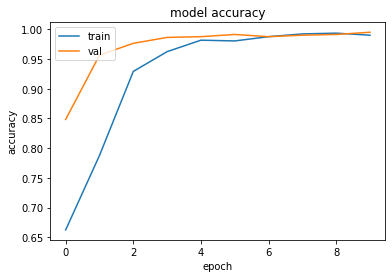

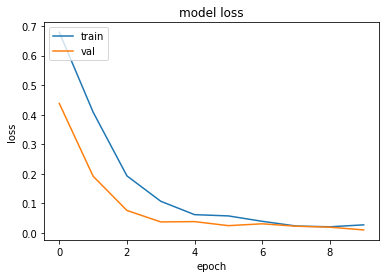

In [286]:
plt.plot(all_new_history.history['accuracy'])
plt.plot(all_new_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(all_new_history.history['loss'])
plt.plot(all_new_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- 사실상 epochs = 7 수준에서 더 돌리는게 의미가 없어보입니다.

## 2. 회고

- 자꾸 데이터를 강조할 수밖에 없을 것 같습니다. 이번에 하이퍼 파라미터를 조절하며 0.01~0.02 수준의 accuracy 향상이 있을 뿐이지 큰 의미는 없어 보입니다.
- 처음부터 양질의 데이터를 많이 넣어서 학습시키자는 것이 요지입니다.
- 물론, 데이터를 구하기 어려운 상황이 있을 것이라는 생각도 듭니다. 이번 프로젝트에서도 혼자 생산하는 데이터는 가위, 바위, 보 각각 200장 정도였기 때문입니다.
- 최대한 데이터를 모으고 모아서 한계에 다다랐을 때 하이퍼 파라미터나 모델의 다른 기능을 활용해서 loss를 내리고 accuracy를 최대한 끌어낼 방법을 찾아보는 것이 좋겠습니다.

- keras layer 추가하면서 요소를 하나씩 뜯어본 게 큰 도움이 되었습니다. 의미를 이해하고 넣으니 큰 그림이 그려집니다.

## 3. References

- 아래의 페이지에서 많은 도움을 받았습니다.

- https://m.blog.naver.com/gyungsumin/221672583583
- https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko
- https://laurencemoroney.com/datasets.html#google_vignette
- https://underflow101.tistory.com/40